In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from pyproj import Transformer
from pathlib import Path

from datautilities import MeshIO as io
from datautilities import meshmethods as mm

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


In [2]:
mesh = io.load_mesh("../Data/FullArea/HR_mesh.pickle")

box_region1 = {"tr": (288000, 146000), "bl": (280000, 136000)}
box_region2 = {"tr": (296000, 162000), "bl": (288000, 154000)}
box_region3 = {"tr": (304000, 192000), "bl": (292000, 176000)}

box_regions = [box_region1, box_region2, box_region3]

In [3]:
region1 = io.load_mesh("../Data/Region1LR4/HR_mesh.pickle")
region2 = io.load_mesh("../Data/Region2LR4/HR_mesh.pickle")
region3 = io.load_mesh("../Data/Region3LR4/HR_mesh.pickle")

In [4]:
x, y = mesh.coords[mesh.boundary-1].T

# Define EPSG
wgs84 = 4326
lambertiii = 27563

# Create transformers from codes
from_lambert = Transformer.from_crs(lambertiii, wgs84, always_xy=True)
xlon, xlat = from_lambert.transform(x, y)

TypeError: invalid number of arguments

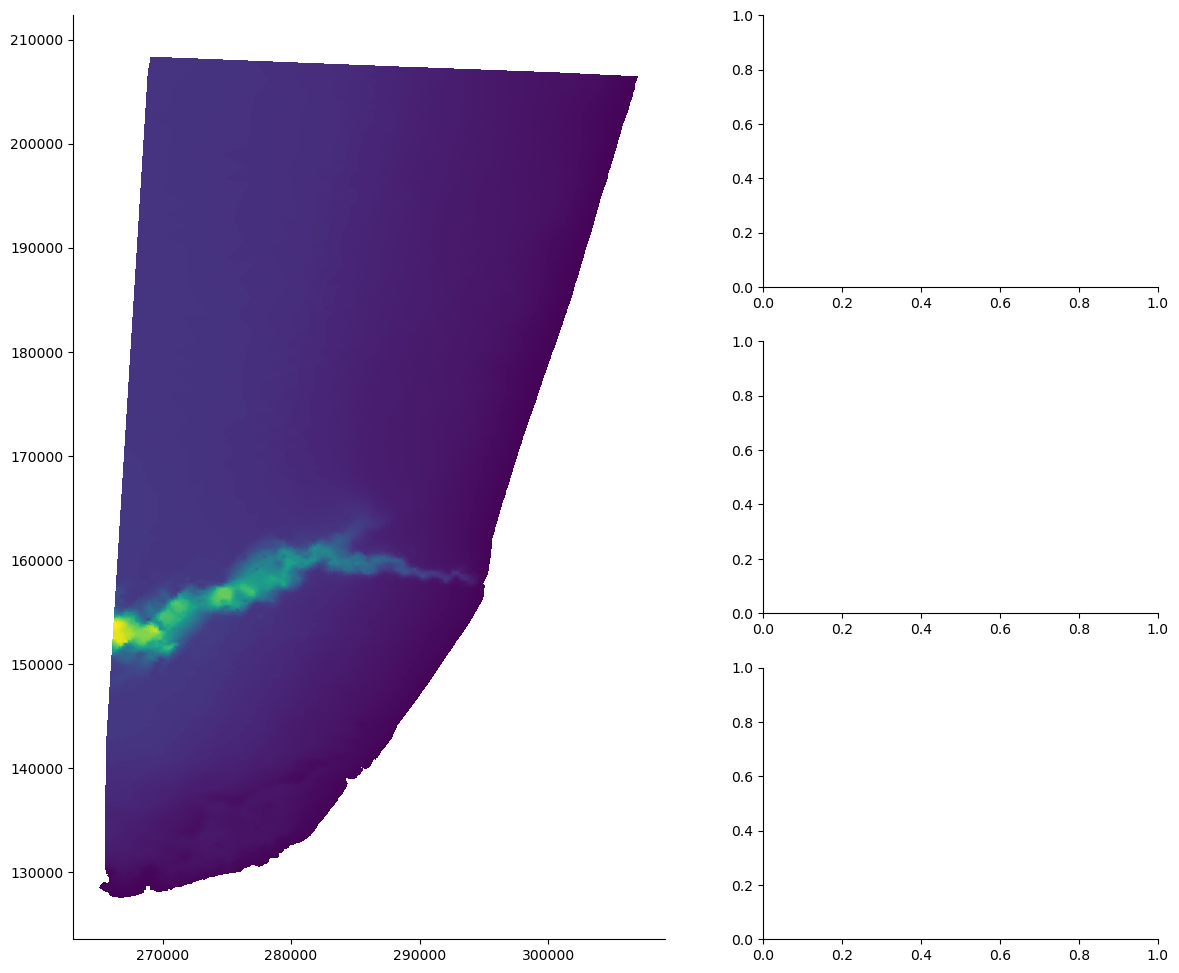

In [5]:
mosaic = [["gen", "reg3"],
          ["gen", "reg2"],
          ["gen", "reg1"]]

fig, axs = plt.subplot_mosaic(mosaic, figsize=(14, 12), width_ratios=(0.6, 0.4))

sns.set_theme(context="paper", style="ticks")
sns.despine()

plt.rcParams["image.cmap"] = "viridis"
# ----------------------- Whole study area ----------------------
im = mm.plot_meshed_data(mesh.values, mesh, ax=axs["gen"])

shift_up = [7000, 6000, 10000]
shift_left = [3000, 3000, 3000]

for idx, box_region in enumerate(box_regions):
    width = box_region["tr"][0] - box_region["bl"][0]
    height = box_region["tr"][1] - box_region["bl"][1]

    r = axs["gen"].add_patch(Rectangle(box_region["bl"], width, height, fill=False,
                     edgecolor="black", lw=3))
    
    axs["gen"].annotate(f"Region{idx+1}", (width/2.0+box_region["bl"][0]-shift_left[idx], height/2.0+box_region["bl"][1]+shift_up[idx]),
                color="orange", fontsize=15, ha="center", va="center", weight="bold")
    axs["gen"].tick_params(labelsize=13)
    
cb = fig.colorbar(im)
cb.set_label("Water Depth [m]", size=20)
cb.ax.tick_params(labelsize=13)

# North arrow
x, y, arrow_length = 0.98, 0.99, 0.045
axs["gen"].annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=25, weight="bold",
                    xycoords=axs["gen"].transAxes)

# Axes labels
axs["gen"].set_xlabel("x [m]", size=18)
axs["gen"].set_ylabel("y [m]", size=18)

axs["gen"].set_title("Coordinates: Lambert Zone III, EPSG:27573",
                     size=15, loc="center")

ax = plt.axes([0.34, 0.125, 0.14, 0.14])
world_map = Basemap(projection="merc", resolution="i", llcrnrlon=-6.43,
                    llcrnrlat=42.28, urcrnrlon=2.37, urcrnrlat=48.62, ax=ax)

# world_map.shadedrelief()
world_map.drawmapboundary(fill_color="lightskyblue")
world_map.drawcoastlines()
world_map.drawcountries()
world_map.fillcontinents(color="tan", lake_color="tab:blue")
xmap, ymap = world_map(xlon, xlat)

ax.fill(xmap, ymap, "red", edgecolor="red")

# Turn axis off
# ax.axis("off")


# ----------------------- Region 1 ----------------------
im = mm.plot_meshed_data(region1.values, region1, ax=axs["reg1"])

axs["reg1"].set_title("Region 1", size=15)
axs["reg1"].xaxis.set_major_locator(plt.MaxNLocator(5))
axs["reg1"].yaxis.set_major_locator(plt.MaxNLocator(6))

cb = fig.colorbar(im)
cb.set_label("Water Depth [m]", size=16)
cb.ax.tick_params(labelsize=13)


# ----------------------- Region 2 ----------------------
im = mm.plot_meshed_data(region2.values, region2, ax=axs["reg2"])

axs["reg2"].set_title("Region 2", size=15)
axs["reg2"].xaxis.set_major_locator(plt.MaxNLocator(5))
axs["reg2"].yaxis.set_major_locator(plt.MaxNLocator(6))

cb = fig.colorbar(im)
cb.set_label("Water Depth [m]", size=16)
cb.ax.tick_params(labelsize=13)


# ----------------------- Region 3 ----------------------
im = mm.plot_meshed_data(region3.values, region3, ax=axs["reg3"])

axs["reg3"].set_title("Region 3", size=15)
axs["reg3"].xaxis.set_major_locator(plt.MaxNLocator(5))
axs["reg3"].yaxis.set_major_locator(plt.MaxNLocator(6))

cb = fig.colorbar(im)
cb.set_label("Water Depth [m]", size=16)
cb.ax.tick_params(labelsize=13)

# plt.tight_layout()
out_path = Path("plots") / "bathymetry_with_regions_and_zoom_ins.png"
out_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()    

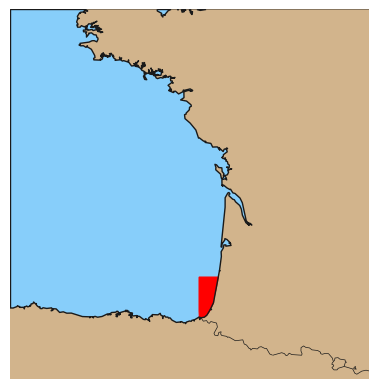

In [61]:
fig, ax = plt.subplots()
world_map = Basemap(projection="merc", resolution="i", llcrnrlon=-6.43,
                    llcrnrlat=42.28, urcrnrlon=2.37, urcrnrlat=48.62, ax=ax)

# world_map.shadedrelief()
world_map.drawmapboundary(fill_color="lightskyblue")
world_map.drawcoastlines()
world_map.drawcountries()
world_map.fillcontinents(color="tan", lake_color="tab:blue")
xmap, ymap = world_map(xlon, xlat)

ax.fill(xmap, ymap, "red", edgecolor="red")

# Turn axis off
ax.axis("off")

plt.show()

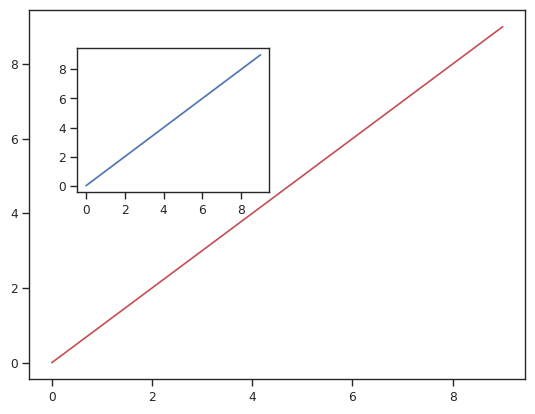

In [62]:
import matplotlib.pyplot as plt

# Create the main axes
fig, ax1 = plt.subplots()

# Plot some data on the main axes
ax1.plot(range(10), 'r-')

# Create the inset axes, specifying its position and size relative to the main axes
ax2 = plt.axes([0.2, 0.5, 0.3, 0.3])

# Plot some data on the inset axes
ax2.plot(range(10), 'b-')

plt.show()